In [ ]:
# Librerías para manipulación de datos y visualización
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Herramientas de Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:

# Cargar los conjuntos de datos
ruta_entrenamiento = '/content/train.csv'
ruta_prueba = '/content/test.csv'

df_entrenamiento = pd.read_csv(ruta_entrenamiento)
df_prueba = pd.read_csv(ruta_prueba)

df_entrenamiento.sample(5)  # Muestra aleatoria en vez de .head()


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
1333,5330a9d1,Summer,11,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3696,ee21612e,Summer,15,0,Winter,60.0,Summer,16.833018,69.0,114.0,...,3.0,2.0,1.0,59.0,Summer,35.0,50.0,Winter,0.0,2.0
1964,7c9c4495,Winter,8,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,2.0,NaN
3621,e9a00f71,Summer,13,0,NaN,NaN,Fall,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0,NaN
997,3cb2c4da,Spring,22,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Exploración estadística del conjunto de entrenamiento
estadisticas_basicas = df_entrenamiento.describe().T
estadisticas_basicas


,count,mean,std,min,25%,50%,75%,max
Basic_Demos-Age,3960.0,10.433586,3.574648,5.0,8.00000,10.000000,13.000000,22.000000
Basic_Demos-Sex,3960.0,0.372727,0.483591,0.0,0.00000,0.000000,1.000000,1.000000
CGAS-CGAS_Score,2421.0,65.454771,22.341862,25.0,59.00000,65.000000,75.000000,999.000000
Physical-BMI,3022.0,19.331929,5.113934,0.0,15.86935,17.937682,21.571244,59.132048
Physical-Height,3027.0,55.946713,7.473764,33.0,50.00000,55.000000,62.000000,78.500000
...,...,...,...,...,...,...,...,...
PCIAT-PCIAT_Total,2736.0,27.896199,20.338853,0.0,12.00000,26.000000,41.000000,93.000000
SDS-SDS_Total_Raw,2609.0,41.088923,10.427433,17.0,33.00000,39.000000,46.000000,96.000000
SDS-SDS_Total_T,2606.0,57.763622,13.196091,38.0,47.00000,55.000000,64.000000,100.000000
PreInt_EduHx-computerinternet_hoursday,3301.0,1.060588,1.094875,0.0,0.00000,1.000000,2.000000,3.000000


In [ ]:
# Vista general del conjunto de datos: tipos de variables y valores nulos
df_entrenamiento.info(verbose=True, memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [ ]:
# Conteo de clases en la variable objetivo
conteo_etiquetas = df_entrenamiento['sii'].value_counts()
conteo_etiquetas


,count
sii,
0.0,1594
1.0,730
2.0,378
3.0,34


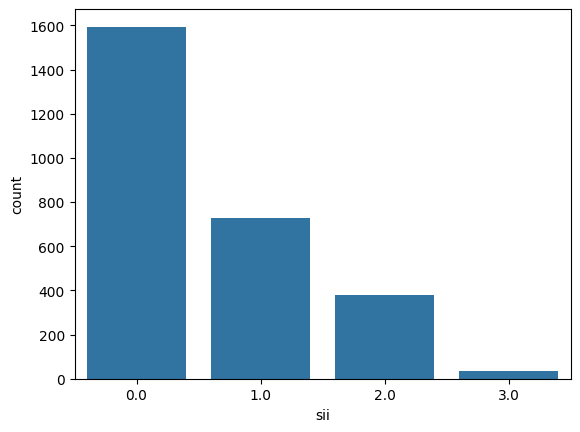

In [ ]:
#grafica la variable sii
sb.countplot(x='sii', data=df_entrenamiento)
plt.show()

In [ ]:
# Filtrar columnas con más del 50% de datos válidos
umbral_nulos = 0.5 * len(df_entrenamiento)
columnas_validas = df_entrenamiento.columns[df_entrenamiento.isnull().sum() < umbral_nulos]
df_entrenamiento = df_entrenamiento[columnas_validas]

# Sustituir valores faltantes por 0
df_entrenamiento = df_entrenamiento.fillna(0)


In [ ]:
# Definir la columna objetivo del modelo
columna_objetivo = 'sii'

# Eliminar registros sin valor en la columna objetivo
df_limpio = df_entrenamiento.dropna(subset=[columna_objetivo])

# Confirmar limpieza
df_limpio.sample(3)
df_limpio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             3960 non-null   object 
 5   CGAS-CGAS_Score                         3960 non-null   float64
 6   Physical-Season                         3960 non-null   object 
 7   Physical-BMI                            3960 non-null   float64
 8   Physical-Height                         3960 non-null   float64
 9   Physical-Weight                         3960 non-null   float64
 10  Physical-Diastolic_BP                   3960 non-null   floa

In [ ]:
import plotly.express as px

# Lista de variables categóricas a analizar
categoricas = [
    'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
    'FGC-Season', 'BIA-Season', 'PCIAT-Season', 'SDS-Season',
    'PreInt_EduHx-Season'
]

# Generar boxplots interactivos con Plotly para mejor exploración
for var in categoricas:
    fig = px.box(df_limpio, x=var, y='sii', points="all", title=f"sii vs {var}")
    fig.show()


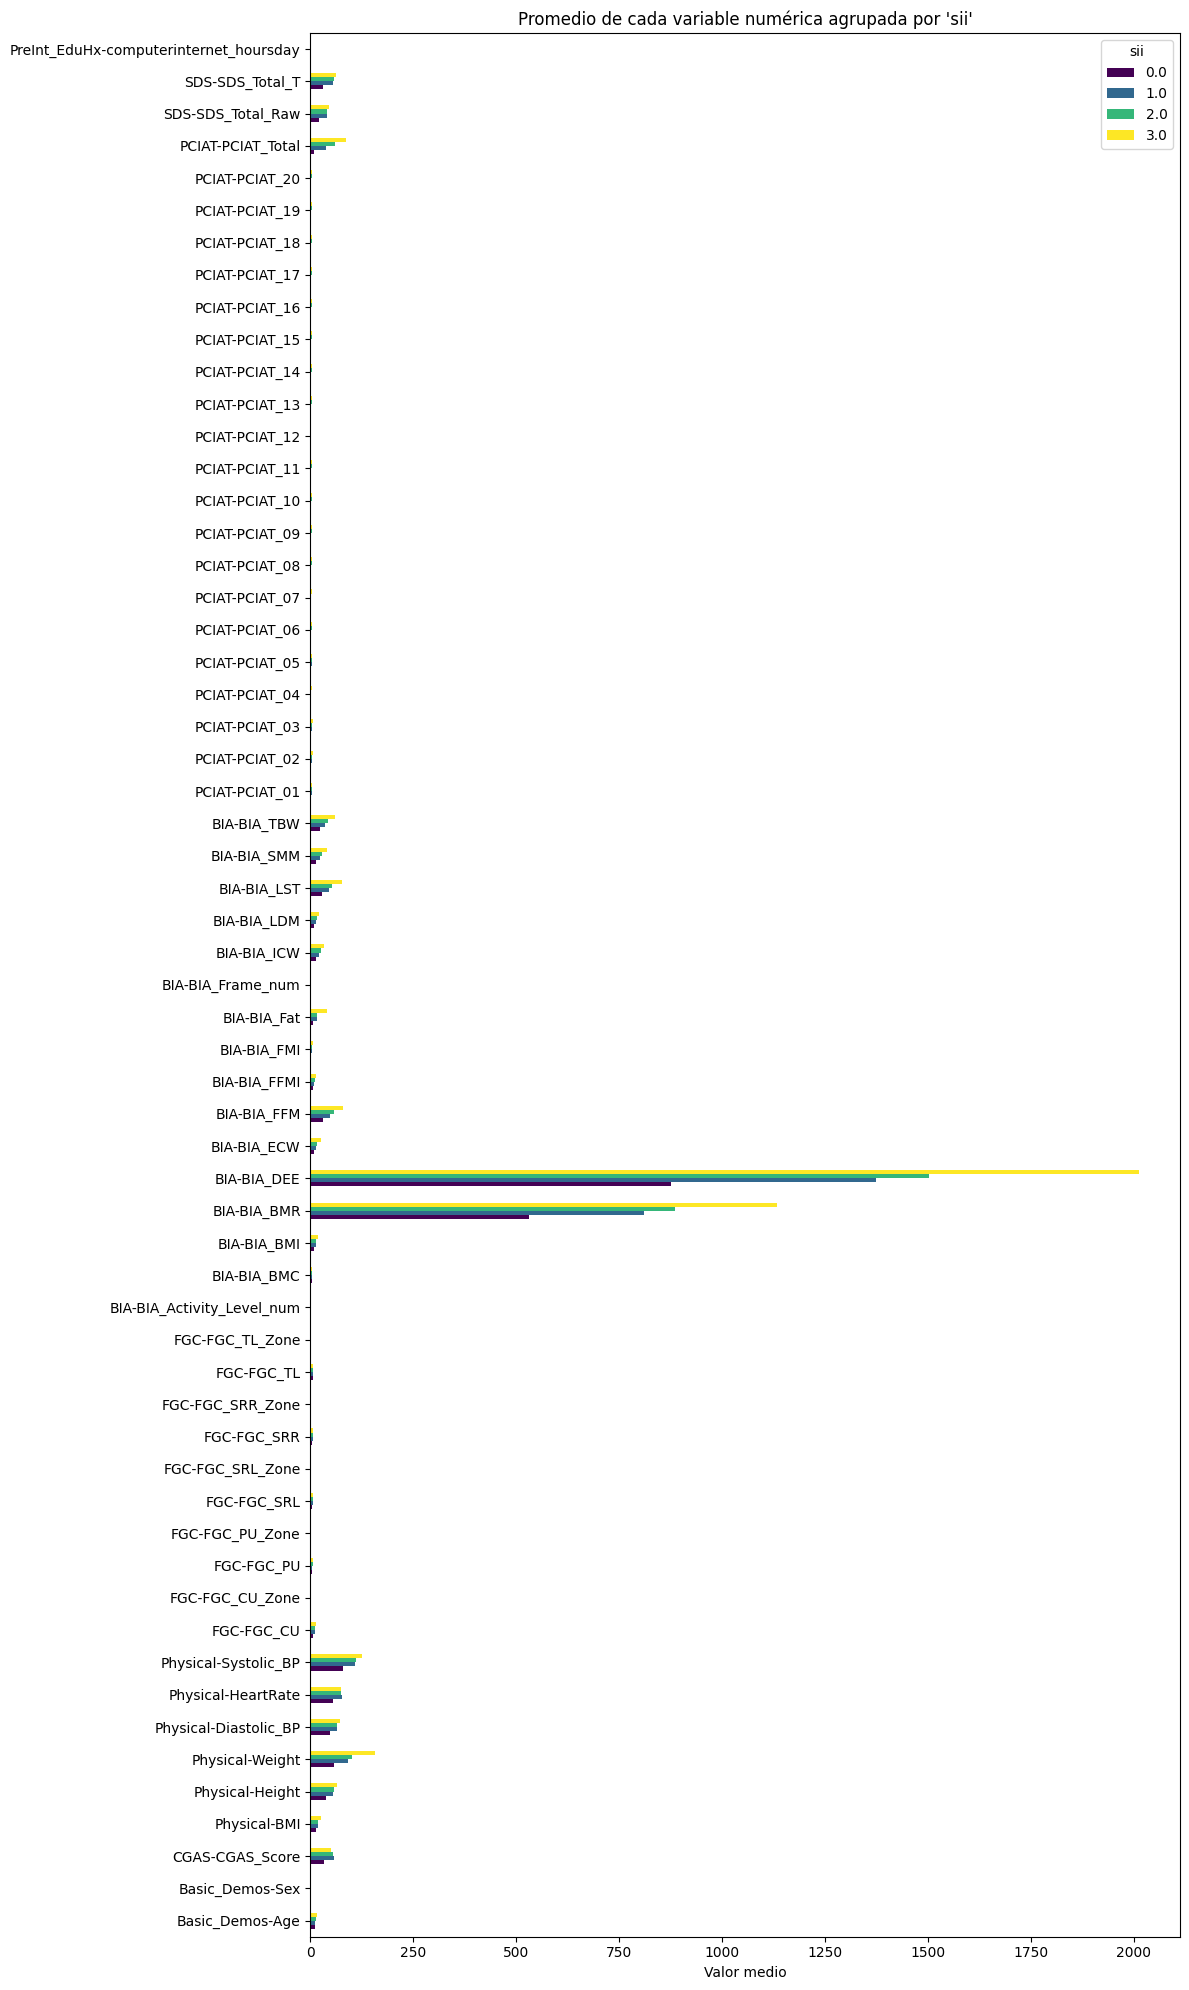

In [ ]:
# Seleccionar columnas numéricas
variables_numericas = df_limpio.select_dtypes(include=['number']).columns.drop('sii')

# Agrupar por la variable objetivo y calcular medias para comparar tendencias
df_promedios = df_limpio.groupby('sii')[variables_numericas].mean().transpose()

# Gráfico de barras con los valores promedio por clase
df_promedios.plot(kind='barh', figsize=(12, 20), colormap='viridis')
plt.title("Promedio de cada variable numérica agrupada por 'sii'")
plt.xlabel("Valor medio")
plt.tight_layout()
plt.show()


In [ ]:
#Lista de columnas que representan estaciones del año
columnas_estacionales = [
    'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
    'FGC-Season', 'BIA-Season', 'PCIAT-Season', 'SDS-Season',
    'PreInt_EduHx-Season'
]

# Diccionario que asigna un valor numérico a cada estación
codificacion_estaciones = {'Spring': 0, 'Summer': 1, 'Fall': 2, 'Winter': 3}

# Reemplazo manual de valores categóricos por numéricos
for columna in columnas_estacionales:
    if columna in df_limpio.columns:
        df_limpio[columna] = df_limpio[columna].replace(codificacion_estaciones)

In [ ]:
import altair as alt

# Eliminar columna 'id' si existe
df_sin_id = df_limpio.drop(columns=['id'], errors='ignore')

# Calcular matriz de correlación
matriz_corr = df_sin_id.corr().stack().reset_index()
matriz_corr.columns = ['Variable1', 'Variable2', 'Correlación']

# Filtrar solo una mitad de la matriz
matriz_corr = matriz_corr[matriz_corr['Variable1'] != matriz_corr['Variable2']]

# Visualizar con Altair
alt.Chart(matriz_corr).mark_rect().encode(
    x='Variable1:O',
    y='Variable2:O',
    color=alt.Color('Correlación:Q', scale=alt.Scale(scheme='redyellowgreen'))
).properties(
    width=500,
    height=500,
    title='Mapa de Calor de Correlaciones'
)

alt.Chart(...)

In [ ]:
# Identificar columnas comunes entre entrenamiento y prueba
columnas_comunes = df_limpio.columns.intersection(df_prueba.columns)

# Matriz de características (sin 'id'), vector objetivo
X = df_limpio[columnas_comunes.drop('id', errors='ignore')]
y = df_limpio['sii']

In [ ]:
# Separar características (X) y etiquetas (y) en conjuntos de entrenamiento y prueba
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(
    X, y, test_size=0.20, shuffle=True, random_state=2
)


In [ ]:
# Normalización de las variables predictoras usando escalado estándar
escalador = StandardScaler()

# Ajustar el escalador con los datos de entrenamiento y transformar
X_entreno_escalado = escalador.fit_transform(X_entreno)

# Aplicar la misma transformación a los datos de prueba
X_prueba_escalado = escalador.transform(X_prueba)


In [ ]:
# Reducción de dimensionalidad: mantener el 95% de la varianza explicada
reductor_pca = PCA(n_components=0.95)

# Ajustar el modelo PCA con los datos escalados de entrenamiento y transformar
X_entreno_pca = reductor_pca.fit_transform(X_entreno_escalado)

# Aplicar la misma transformación a los datos de prueba
X_prueba_pca = reductor_pca.transform(X_prueba_escalado)


### Entrenamiento Random  Forest

In [ ]:
# Crear una instancia del clasificador Random Forest con parámetros personalizados
modelo_bosque = RandomForestClassifier(
    n_estimators=100,         # Número de árboles en el bosque
    max_depth=10,             # Profundidad máxima permitida por árbol
    min_samples_split=10,     # Mínimo de muestras para dividir un nodo
    min_samples_leaf=4,       # Mínimo de muestras requeridas en una hoja
    random_state=42           # Semilla para reproducibilidad
)


In [ ]:
# Entrenar el modelo Random Forest con los datos reducidos mediante PCA
modelo_bosque.fit(X_entreno_pca, y_entreno)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

###EVALUACION DEL MODELO

In [ ]:
# Realizar predicciones con los datos de prueba reducidos por PCA
predicciones = modelo_bosque.predict(X_prueba_pca)

# Mostrar informe de clasificación
print("🔎 Informe de Clasificación:")
print(classification_report(y_prueba, predicciones))

# Mostrar la matriz de confusión
print("🔀 Matriz de Confusión:")
print(confusion_matrix(y_prueba, predicciones))

# Calcular precisión del modelo sobre el conjunto de prueba
precision_modelo = modelo_bosque.score(X_prueba_pca, y_prueba)
print(f"✅ Precisión del modelo: {precision_modelo:.4f}")


🔎 Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.74      0.97      0.84       563
         1.0       0.26      0.09      0.13       141
         2.0       0.50      0.02      0.05        84
         3.0       0.00      0.00      0.00         4

    accuracy                           0.71       792
   macro avg       0.37      0.27      0.25       792
weighted avg       0.62      0.71      0.62       792

🔀 Matriz de Confusión:
[[547  16   0   0]
 [127  12   2   0]
 [ 66  16   2   0]
 [  1   3   0   0]]
✅ Precisión del modelo: 0.7083


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

